In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gym
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.sarsa_agent import SarsaAgent
from src.loops import train, evaluate
from src.viz import plot_policy
from src.config import SAVED_AGENTS_DIR
from src.viz import plot_policy
from src.momentum_agent import MomentumAgent

In [3]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

In [4]:
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor

agent = SarsaAgent(env, alpha, gamma)

In [5]:
rewards, max_positions = train(
    agent, env, n_episodes=10000, epsilon=0.1)

Epsilon: 0.10: 100%|█████████████████████████████████████████████████████████████| 10000/10000 [06:34<00:00, 25.38it/s]


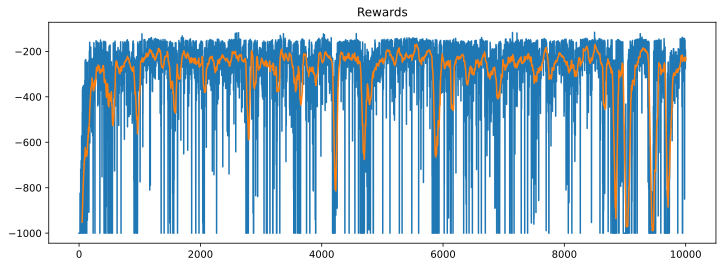

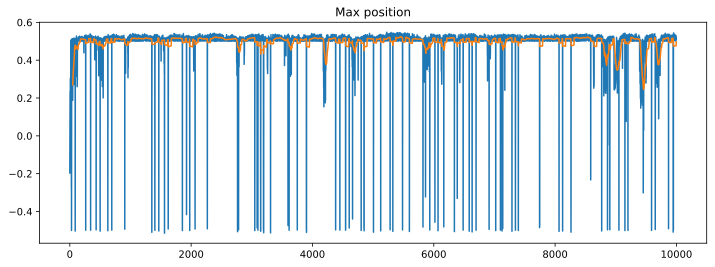

In [6]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='line')
pd.Series(rewards).rolling(window=50).mean().plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(max_positions).plot(kind='line')
pd.Series(max_positions).rolling(window=50).mean().plot(kind='line')
plt.show()

In [7]:
n_episodes = 1000
eval_rewards, eval_max_positions = evaluate(
    agent, env, n_episodes)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.70it/s]


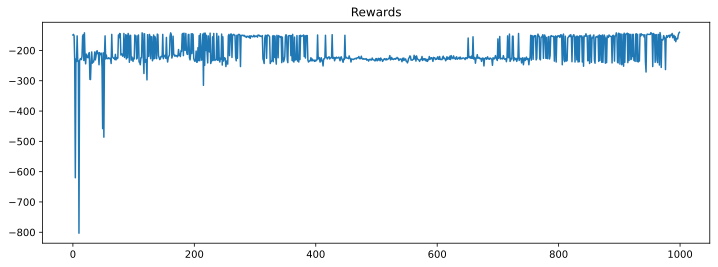

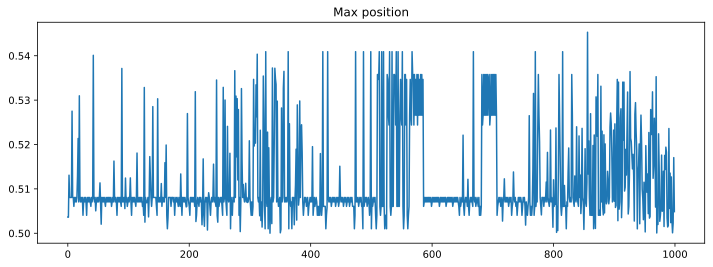

In [8]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")    
pd.Series(eval_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(eval_max_positions).plot(kind='line')
plt.show()

In [9]:
n_completed = sum([1 if m > 0.5 else 0 for m in eval_max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

1000 success out of 1000 attempts


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


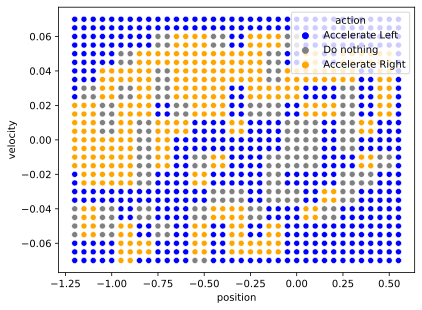

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Left
2,-1.20,-0.060,Accelerate Left
3,-1.20,-0.055,Do nothing
4,-1.20,-0.050,Do nothing
...,...,...,...
1039,0.55,0.050,Accelerate Left
1040,0.55,0.055,Accelerate Left
1041,0.55,0.060,Accelerate Left
1042,0.55,0.065,Accelerate Left


In [12]:
positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)

plot_policy(agent, positions, velocities)

In [13]:
path = SAVED_AGENTS_DIR / 'sarsa_agent_10k_steps'
print(f'Saving agent to {path}')
agent.save_to_disk(path)

Saving agent to C:\Users\laura\Reinforcement Learning\MountainCar\saved_agents\sarsa_agent_10k_steps


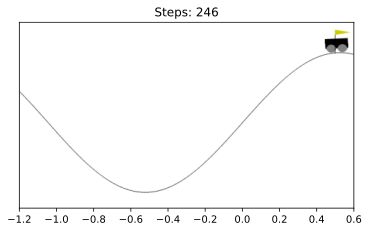

In [14]:
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)

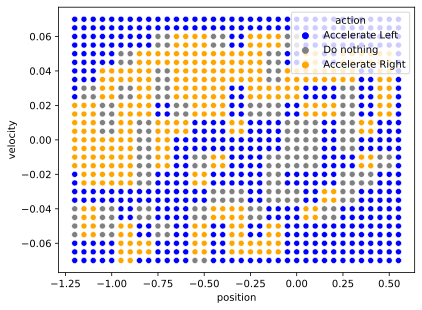

In [15]:
positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
sarsa_policy = plot_policy(agent, positions, velocities)

##### **Momentum vs SARSA**

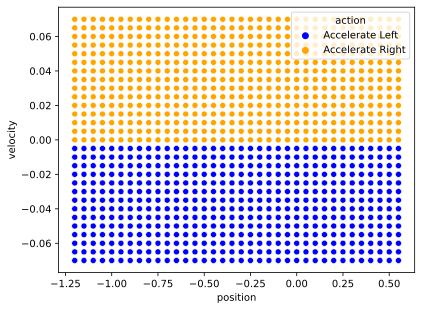

In [16]:
perfect_agent = MomentumAgent(env)
perfect_policy = plot_policy(perfect_agent, positions, velocities)

In [17]:
perfect_action = perfect_policy['action']
sarsa_action = sarsa_policy['action']

(perfect_action == sarsa_action).sum() / len(perfect_action)

0.48084291187739464